# Aim of the project

PL:
Celem projektu jest przygotowanie metody obcinającej czaszki (skull stripping) na obrazach sekwencji typu T1 rezonansu magnetycznego (MRI) głowy. Metoda powinna z surowego skanu pacjenta wyodrębnić cały obszar zajmowany przez właściwy mózg, pomijając kości, inne tkanki miękkie itp. - ilustracja na rysunku poniżej:
![](https://www.researchgate.net/profile/Dario_Pompili/publication/309402865/figure/fig1/AS:420915604148224@1477365508110/Skull-stripping-steps-A-input-images-B-brain-contouring-and-C-removal-of.png)

Poniżej znajduje się przykładowy kod pobierający, rozpakowujący oraz wczytujący dane do macierzy `numpy` o trzech wymiarach. Dodatkowo załączona jest funkcja wizualizująca środkowe slice'y (przekroje) w każdej z trzech osi macierzy.

ENG:

The aim of the project is to prepare the skull stripping method on T1 magnetic resonance imaging (MRI) images of the head. The method should extract the entire area occupied by the proper brain from the raw scan of the patient, excluding bones, other soft tissues, etc. - see the illustration below:

![](https://www.researchgate.net/profile/Dario_Pompili/publication/309402865/figure/fig1/AS:420915604148224@1477365508110/Skull-stripping-steps-A-input-images-B-brain-contouring-and-C-removal-of.png)

The following is an example of code that retrieves, extracts, and loads data into a three-dimensional `numpy` matrix. In addition, the function visualizing the middle slices (sections) in each of the three axes of the matrix is included.

# Example code with description

In [ ]:
!pip install --upgrade nibabel

     |████████████████████████████████| 3.3MB 4.9MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


# Mount storage

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! ls '/content/drive/My Drive/dane'

train_x_frames	train_y_masks	valid_x_frames	valid_y_masks
train_x_masks	train_z_frames	valid_x_masks	valid_z_frames
train_y_frames	train_z_masks	valid_y_frames	valid_z_masks


# Download DATASET

In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

--2020-05-25 18:13:55--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPVFObHpZOWNBMkVn [following]
--2020-05-25 18:13:55--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUUR

Check number of files

In [ ]:
import os
NO_OF_nii_files = len(os.listdir('FirstDataset/train'))

print(NO_OF_nii_files)

574


# Data processing

In [ ]:
import numpy as np
import nibabel as nib
import cv2 as cv
from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

def save_slices(slice1, path_to_store):
    plt.imsave( path_to_store,slice1.T, cmap="gray", origin="lower")




(256, 256)
(256, 256)


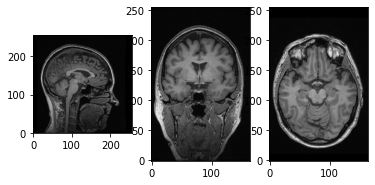

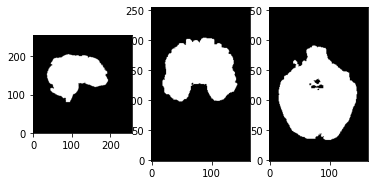

In [ ]:
import matplotlib.pyplot as plt

# Zmienna affine zawiera macierz, która będzie potrzebna przy zapisie predykcji do pliku
raw_volume, affine = load_raw_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6.nii.gz')
mask_volume = load_labels_volume('/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6_mask.nii.gz')

show_slices([raw_volume[raw_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             raw_volume[:, raw_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             raw_volume[:, :, raw_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z

show_slices([mask_volume[mask_volume.shape[0] // 2], # Środkowy slice 2D w osi x
             mask_volume[:, mask_volume.shape[1] // 2], # Środkowy slice 2D w osi y
             mask_volume[:, :, mask_volume.shape[2] // 2]]) # Środkowy slice 2D w osi z

save_slices(raw_volume[raw_volume.shape[0] // 2], '/content/drive/My Drive/dane/test.png' )
print(raw_volume[raw_volume.shape[0] // 2].shape)
print(mask_volume[mask_volume.shape[0] // 2].shape)


In [ ]:
counter_x = 0
counter_y = 0
counter_z = 0

In [ ]:
# Load whole data from one .nii.gz file
# Zmienna affine zawiera macierz, która będzie potrzebna przy zapisie predykcji do pliku
raw_filename = '/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6.nii.gz'
mask_filename = '/content/FirstDataset/train/e66ce7e96b277d7d1b8835e5d2c94cd6_mask.nii.gz'

def load_data_from_file(raw_file, mask_file, counter_x, counter_y, counter_z, train=True):
  raw_volume, affine = load_raw_volume(raw_file)
  mask_volume = load_labels_volume(mask_file)

  # SAVE  X
  if train:
    dir_to_save_x_img = '/content/drive/My Drive/dane/train_x_frames/train'
    dir_to_save_x_mask = '/content/drive/My Drive/dane/train_x_masks/train'
  else:
    dir_to_save_x_img = '/content/drive/My Drive/dane/valid_x_frames/val'
    dir_to_save_x_mask = '/content/drive/My Drive/dane/valid_x_masks/val'

  for x_shape in range(raw_volume.shape[0]):
    save_slices(raw_volume[x_shape], os.path.join(dir_to_save_x_img, str(counter_x)+'.png'))
    save_slices(mask_volume[x_shape], os.path.join(dir_to_save_x_mask, str(counter_x)+'.png'))
    counter_x += 1

  # SAVE Y
  if train:
    dir_to_save_y_img = '/content/drive/My Drive/dane/train_y_frames/train'
    dir_to_save_y_mask = '/content/drive/My Drive/dane/train_y_masks/train'
  else:
    dir_to_save_y_img = '/content/drive/My Drive/dane/valid_y_frames/val'
    dir_to_save_y_mask = '/content/drive/My Drive/dane/valid_y_masks/val'

  for y_shape in range(raw_volume.shape[1]):
    save_slices(raw_volume[:,y_shape], os.path.join(dir_to_save_y_img, str(counter_y)+'.png'))
    save_slices(mask_volume[:,y_shape], os.path.join(dir_to_save_y_mask, str(counter_y)+'.png'))
    counter_y += 1

  # SAVE Z
  if train:
    dir_to_save_z_img = '/content/drive/My Drive/dane/train_z_frames/train'
    dir_to_save_z_mask = '/content/drive/My Drive/dane/train_z_masks/train'
  else:
    dir_to_save_z_img = '/content/drive/My Drive/dane/valid_z_frames/val'
    dir_to_save_z_mask = '/content/drive/My Drive/dane/valid_z_masks/val'

  for z_shape in range(raw_volume.shape[2]):
    save_slices(raw_volume[:,:,z_shape], os.path.join(dir_to_save_z_img, str(counter_z)+'.png'))
    save_slices(mask_volume[:,:,z_shape], os.path.join(dir_to_save_z_mask, str(counter_z)+'.png'))
    counter_z += 1

  return counter_x, counter_y, counter_z

In [ ]:
load_data_from_file(raw_filename, mask_filename, counter_x, counter_y, counter_z)

In [ ]:
first_dataset_path = Path('/content/FirstDataset/train')
second_dataset_path = Path('/content/SecondDataset/train')

In [ ]:
count = 0
counter_x = 0
counter_y = 0
counter_z = 0

for file_path in first_dataset_path.iterdir():
  if file_path.name.endswith('mask.nii.gz'):
    if count < 216:
      raw_path = str(file_path).replace('_mask','')
      print('------train ' + str(count) + ', ' + str(counter_x)
      + ', ' + str(counter_y) + ', ' + str(counter_z))
      print(file_path)
      print(raw_path)
      counter_x, counter_y, counter_z = load_data_from_file(raw_path, file_path, counter_x, counter_y, counter_z)
    else:
      raw_path = str(file_path).replace('_mask','')
      print('------val '+ str(count) + ', ' + str(counter_x)
      + ', ' + str(counter_y) + ', ' + str(counter_z))
      print(file_path)
      print(raw_path)
      counter_x, counter_y, counter_z = load_data_from_file(raw_path, file_path, counter_x, counter_y, counter_z,train=False)
    count += 1

    

PL:

Fizyczne rozmiary wokseli są do siebie podobne - raczej nie musimy nic robić z różnicami rzędu 0.2 - 0.3 mm. Alternatywą byłoby wykorzystanie na przykład funkcji `zoom` z biblioteki `scipy` (uwaga - jest wolna). Obecne tutaj różnice mogą nawet paradoksalnie poprawić generalizację sieci.

Na tym etapie należy podzielić dane (najprawdopodobniej ścieżki do nich po wczytaniu ich listy w Pythonie) na zbiór treningowy i walidacyjny, a następnie wyeksportować podzielone dane do dwuwymiarowych obrazów - najlepiej w bezstratnym formacie PNG.

Sugerowany jest podział na zbiór treningowy i walidacyjny już w wyeksportowanych danych na dysku, ale można go oczywiście realizować podczas wczytywania ścieżek danych do uczenia w kodzie źródłowym. Zachęcamy do eksperymentów, ale zaznaczamy, że zazwyczaj lepiej jest przenosić do zbioru walidacyjnego całe skany, a nie losowe przekroje. Przeniesienie losowych przekrojów powoduje, że sieć jest walidowana na fragmencie skanu, którego inne fragmenty są w zbiorze treningowym - mamy gorszą kontrolę przeuczenia, ale z drugiej strony sieć "widzi" podczas treningu więcej różnych skanów.

Przy eksporcie wymagane będzie przeiterowanie się po obu zbiorach danych, wczytywanie kolejnych skanów do pamięci (jak wyżej, ale z wykorzystaniem załączonych funkcji wczytujących), a następnie eksport danych w wybranej osi. Kopię wyeksportowanych danych warto umieścić na podmontowanym Dysku Google. W sytuacji wygaśnięcia sesji Colaba umożliwi to ich późniejsze przekopiowanie na maszynę docelową bez powtarzania procesu eksportu.

Po wyeksportowaniu danych można wykorzystać podejście znane z instrukcji dotyczącej segmentacji. Można testować różne przekroje danych (ostateczne podejście nie musi wcale być jedną siecią - można nauczyć modele dla każdego przekroju), różne modele sieci neuronowych (w tym z pretreningiem i bez), różne loss functions, różne learning rates, różne augmentacje, różne rodzaje normalizacji danych itd.

Po wytrenowaniu ostatecznego modelu można wygenerować predykcje dla zbioru testowego. Poniżej znajduje się ogólnikowy przykład generowania predykcji.

ENG:

The physical sizes of the voxels are similar - we don't need to do anything with differences of 0.2 - 0.3 mm. An alternative would be to use, for example, the `zoom` function from the` scipy` library (note - it's free). The differences present here can even paradoxically improve network generalization.

At this stage, you should divide the data (most likely the paths to them after loading their list in Python) into a training and validation set, and then export the divided data into two-dimensional images - preferably in a lossless PNG format.

It is suggested to divide into a training and validation set already in the exported data on the disk, but it can of course be implemented when loading the data paths for learning in the source code. We encourage experiments, but we point out that it is usually better to transfer entire scans to the validation set, rather than random sections. The transfer of random cross-sections causes that the network is validated on a scan fragment, which other fragments are in the training set - we have worse control of overfitting, but on the other hand the network "sees" more different scans during training.

When exporting, you will be required to spell out both data sets, load subsequent scans into memory (as above, but using the attached read functions), and then export data in the selected axis. A copy of the exported data should be placed on a mounted Google Drive. If the Colaba session expires, this will allow them to be copied to the target machine later without repeating the export process.

After exporting the data, you can use the approach known from the segmentation instructions. You can test different data cross-sections (the final approach does not have to be one network at all - models for each cross-section can be taught), different models of neural networks (including and without pre-training), different loss functions, different learning rates, different augmentations, different types of normalization data etc.

After training the final model, you can generate predictions for the test set. Below is a general example of generating predictions.

# Create generators

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! cp '/content/drive/My Drive/dane_lokalne/dane.zip' /content/dane2.zip

In [ ]:
! mkdir /content/dane2
!jar xvf /content/dane2.zip

In [ ]:
dir_to_train_x_img = '/content/dane/train_x_frames'
dir_to_train_x_mask = '/content/dane/train_x_masks'

dir_to_train_y_img = '/content/dane/train_y_frames'
dir_to_train_y_mask = '/content/dane/train_y_masks'

dir_to_train_z_img = '/content/dane/train_z_frames'
dir_to_train_z_mask = '/content/dane/train_z_masks'

dir_to_valid_x_img = '/content/dane/valid_x_frames'
dir_to_valid_x_mask = '/content/dane/valid_x_masks'

dir_to_valid_y_img = '/content/dane/valid_y_frames'
dir_to_valid_y_mask = '/content/dane/valid_y_masks'

dir_to_valid_z_img = '/content/dane/valid_z_frames'
dir_to_valid_z_mask = '/content/dane/valid_z_masks'

seed = 42
BS = 16
img_size = 128

In [ ]:
import tensorflow as tf

data_gen_args = dict(rescale=1/255,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    rotation_range=30)

train_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **data_gen_args)

train_masks_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **data_gen_args)

train_flow_args = dict(batch_size = BS,
    seed = seed,
    class_mode = None,
    color_mode = 'grayscale')

ffd_x_img_train = train_images_datagen.flow_from_directory(
    dir_to_train_x_img, **train_flow_args)

ffd_x_mask_train = train_masks_datagen.flow_from_directory(
    dir_to_train_x_mask,**train_flow_args)

ffd_x_train = zip(ffd_x_img_train, ffd_x_mask_train)


ffd_y_img_train = train_images_datagen.flow_from_directory(
    dir_to_train_y_img, **train_flow_args)

ffd_y_mask_train = train_masks_datagen.flow_from_directory(
    dir_to_train_y_mask, **train_flow_args)

ffd_y_train = zip(ffd_y_img_train, ffd_y_mask_train)


ffd_z_img_train = train_images_datagen.flow_from_directory(
    dir_to_train_z_img, **train_flow_args)

ffd_z_mask_train = train_masks_datagen.flow_from_directory(
    dir_to_train_z_mask, **train_flow_args)

ffd_z_train = zip(ffd_z_img_train, ffd_z_mask_train)

Found 43760 images belonging to 1 classes.
Found 43760 images belonging to 1 classes.
Found 53496 images belonging to 1 classes.
Found 53496 images belonging to 1 classes.
Found 55712 images belonging to 1 classes.
Found 55712 images belonging to 1 classes.


In [ ]:
valid_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
valid_masks_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

valid_flow_args = dict(batch_size = BS,
    seed = seed,
    class_mode = None,
    color_mode = 'grayscale')

ffd_x_img_valid = valid_images_datagen.flow_from_directory(
    dir_to_valid_x_img, **valid_flow_args)

ffd_x_mask_valid = valid_masks_datagen.flow_from_directory(
    dir_to_valid_x_mask,**valid_flow_args)

ffd_x_valid = zip(ffd_x_img_valid, ffd_x_mask_valid)


ffd_y_img_valid = valid_images_datagen.flow_from_directory(
    dir_to_valid_y_img,**valid_flow_args)

ffd_y_mask_valid = valid_masks_datagen.flow_from_directory(
    dir_to_valid_y_mask,**valid_flow_args)

ffd_y_valid = zip(ffd_y_img_valid, ffd_y_mask_valid)


ffd_z_img_valid = valid_images_datagen.flow_from_directory(
    dir_to_valid_z_img,**valid_flow_args)

ffd_z_mask_valid = valid_masks_datagen.flow_from_directory(
    dir_to_valid_z_mask, **valid_flow_args)

ffd_z_valid = zip(ffd_z_img_valid, ffd_z_mask_valid)

Found 13999 images belonging to 1 classes.
Found 13999 images belonging to 1 classes.
Found 17190 images belonging to 1 classes.
Found 17190 images belonging to 1 classes.
Found 18080 images belonging to 1 classes.
Found 18080 images belonging to 1 classes.


In [ ]:
import matplotlib.pyplot as plt
from google.colab import patches as gc

import numpy as np
def show_img_mask(imlist):
  count = len(imlist)
  final = imlist[0]*255.0
  for i in range(count -1):
    final = np.concatenate((final,imlist[i+1]*255.0),axis=1)
  gc.cv2_imshow(final)


(256, 256, 1)
(256, 256, 1)


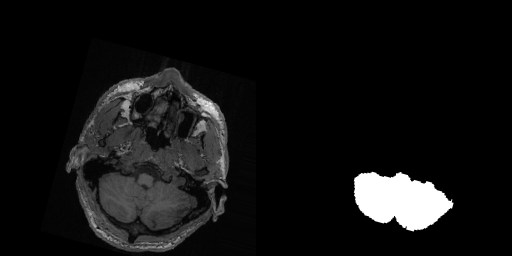

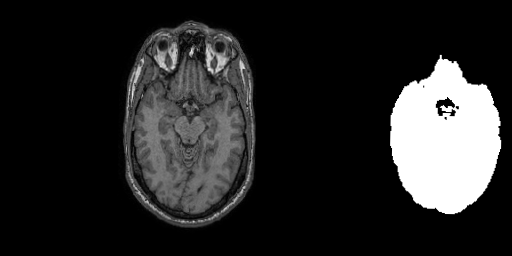

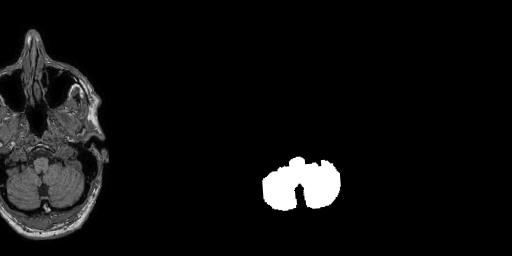

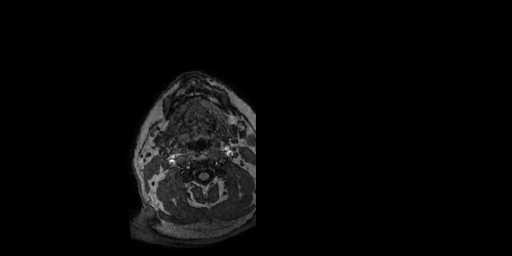

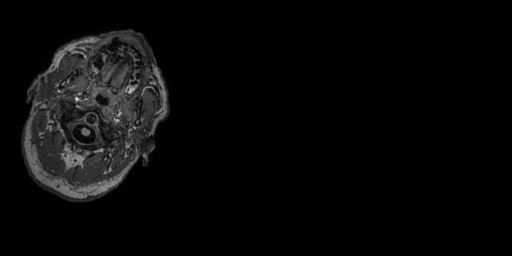

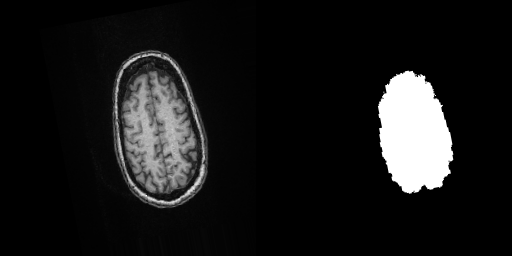

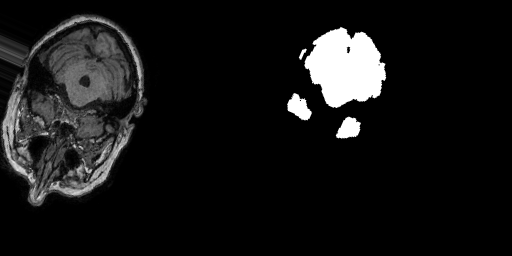

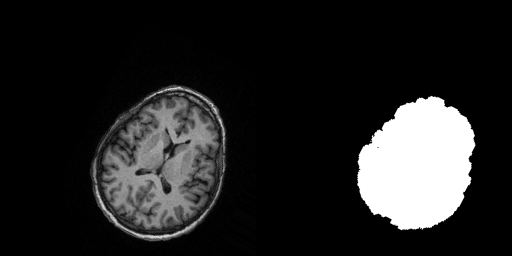

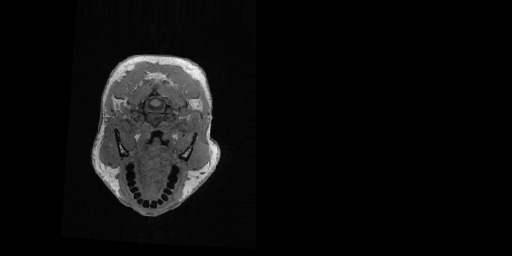

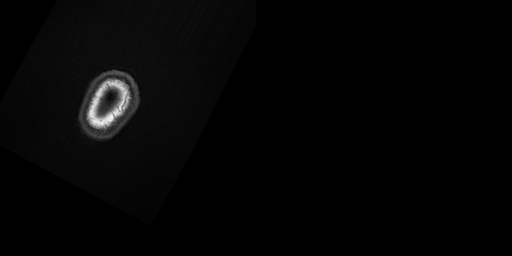

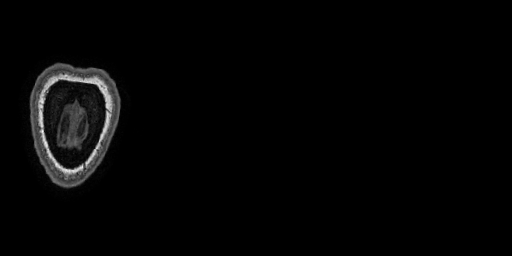

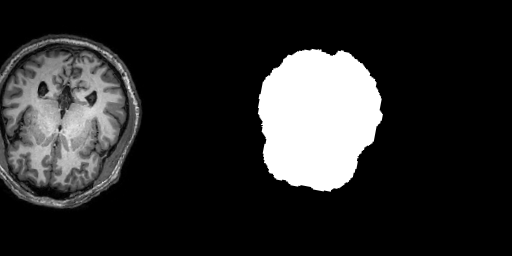

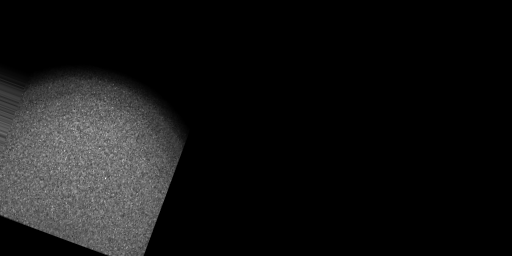

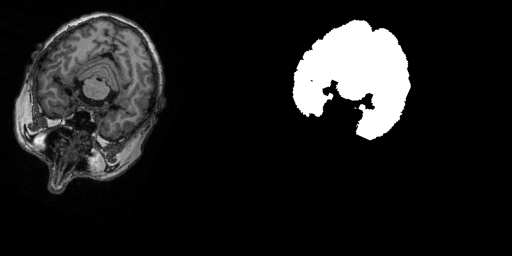

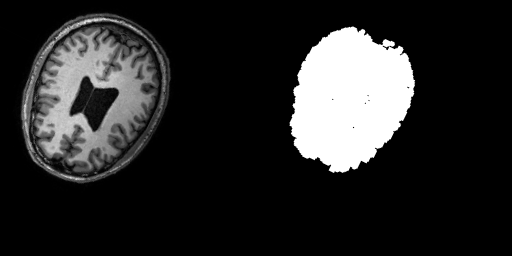

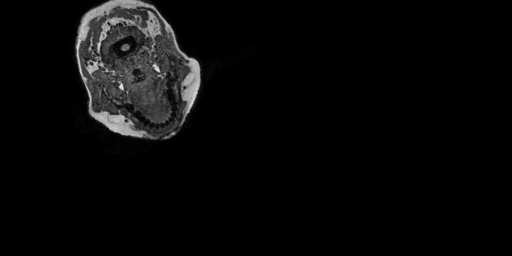

In [ ]:
test_batch = next(ffd_z_img_train)
test_batch_masks = next(ffd_z_mask_train)

print(test_batch[0].shape)
print(test_batch_masks[0].shape)
for i, im in enumerate(test_batch):
  show_img_mask([test_batch[i],test_batch_masks[i]])

# Train one axis

In [ ]:
!pip install segmentation_models

In [ ]:
import os
count_x_img = len(os.listdir('/content/dane/train_x_frames/train'))
print(count_x_img)
count_x_masks = len(os.listdir('/content/dane/valid_x_frames/val'))
print(count_x_masks)
count_y_img = len(os.listdir('/content/dane/train_y_frames/train'))
print(count_y_img)
count_y_masks = len(os.listdir('/content/dane/valid_y_frames/val'))
print(count_y_masks)
count_z_img = len(os.listdir('/content/dane/train_z_frames/train'))
print(count_z_img)
count_z_masks = len(os.listdir('/content/dane/valid_z_frames/val'))
print(count_z_masks)

43760
13999
53496
17190
55712
18080


In [ ]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import tensorflow as tf


Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:


model = Unet('efficientnetb0',encoder_weights=None, input_shape=(None,None,1))

BACKBONE = 'efficientnetb0'
preprocess_input = get_preprocessing(BACKBONE)

optimizer = tf.keras.optimizers.Adam()

iou= tf.keras.metrics.MeanIoU(num_classes=1)

model.compile(optimizer = optimizer, loss=bce_jaccard_loss, metrics=[iou_score])

earlystopping = EarlyStopping(monitor = 'val_iou_score', verbose = 1,
                              min_delta = 0.01, patience = 5, mode = 'max',
                              restore_best_weights = True)

callbacks_list = [earlystopping]

history = model.fit_generator(ffd_y_train,
                              count_y_img // BS, 20 ,
                              validation_data=ffd_x_valid, 
                              validation_steps=(count_y_masks // BS),
                              callbacks=callbacks_list)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 288         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
____________________________________________________________________________________________

# Save model

In [ ]:
!mkdir '/content/drive/My Drive/2unet_effnetb2_Y'

In [ ]:
path_to_model = '/content/drive/My Drive/2unet_effnetb2_Y/net_model.p'
path_to_weights = '/content/drive/My Drive/2unet_effnetb2_Y/net_weig.h5'

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open(path_to_model, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path_to_weights)
print("Saved model to disk")

Saved model to disk


# Train X,Y,Z

In [ ]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

BACKBONE = 'efficientnetb1'
preprocess_input = get_preprocessing(BACKBONE)

optimizer = tf.keras.optimizers.Adam()
earlystopping = EarlyStopping(monitor = 'val_iou_score', verbose = 1,
                              min_delta = 0.001, patience = 3, mode = 'max',
                              restore_best_weights = True)
def scheduler(epoch, lr):
  if epoch % 10 == 0:
     lr = lr / 10.0
  return lr

sched_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callbacks_list = [earlystopping]

iou= tf.keras.metrics.MeanIoU(num_classes=1)

# X axis ----------------------------------------------------------------
model = Unet('efficientnetb1',encoder_weights=None, input_shape=(None,None,1))
model.compile(optimizer = optimizer, loss=bce_jaccard_loss, metrics=[iou_score])
history = model.fit_generator(ffd_x_train,
                              count_x_img // BS, 1 ,
                              validation_data=ffd_x_valid, 
                              validation_steps=(count_x_masks // BS),
                              callbacks=None)

!mkdir '/content/drive/My Drive/unet_effnetb1_X'
path_to_model = '/content/drive/My Drive/unet_effnetb1_X/net_model.p'
path_to_weights = '/content/drive/My Drive/unet_effnetb1_X/net_weig.h5'

# serialize model to JSON
model_json = loaded_model.to_json()
with open(path_to_model, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights(path_to_weights)
print("Saved model to disk")

# Y axis ----------------------------------------------------------------
model = Unet('efficientnetb1',encoder_weights=None, input_shape=(None,None,1))
model.compile(optimizer = optimizer, loss=bce_jaccard_loss, metrics=[iou_score])
history = model.fit_generator(ffd_y_train,
                              count_y_img // BS, 1 ,
                              validation_data=ffd_y_valid, 
                              validation_steps=(count_y_masks // BS),
                              callbacks=None)

!mkdir '/content/drive/My Drive/unet_effnetb1_Y'
path_to_model = '/content/drive/My Drive/unet_effnetb1_Y/net_model.p'
path_to_weights = '/content/drive/My Drive/unet_effnetb1_Y/net_weig.h5'
# serialize model to JSON
model_json = loaded_model.to_json()
with open(path_to_model, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights(path_to_weights)
print("Saved model to disk")

# Z axis ----------------------------------------------------------------
model = Unet('efficientnetb1',encoder_weights=None, input_shape=(None,None,1))
model.compile(optimizer = optimizer, loss=bce_jaccard_loss, metrics=[iou_score])
history = model.fit_generator(ffd_z_train,
                              count_z_img // BS, 1 ,
                              validation_data=ffd_z_valid, 
                              validation_steps=(count_z_masks // BS),
                              callbacks=None)

!mkdir '/content/drive/My Drive/unet_effnetb1_Z'
path_to_model = '/content/drive/My Drive/unet_effnetb1_Z/net_model.p'
path_to_weights = '/content/drive/My Drive/unet_effnetb1_Z/net_weig.h5'
# serialize model to JSON
model_json = loaded_model.to_json()
with open(path_to_model, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights(path_to_weights)
print("Saved model to disk")


# Load model

In [ ]:
path_to_model = '/content/drive/My Drive/2unet_effnetb1_X/net_model.p'
path_to_weights = '/content/drive/My Drive/2unet_effnetb1_X/net_weig.h5'
# load json and create model
json_file = open(path_to_model, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json, custom_objects={'FixedDropout':tf.keras.layers.Dropout})
# load weights into new model
loaded_model.load_weights(path_to_weights)
print("Loaded model from disk")

Loaded model from disk


# Test 

In [ ]:
def round_mask(mask, treshold):
  rounded = np.copy(mask)
  rounded[np.where(np.all(mask > treshold, axis=-1))]=1
  rounded[np.where(np.all(mask <= treshold, axis=-1))]=0
  return rounded


1/1 [==============================] - 0s 1ms/step - loss: 0.0577 - iou_score: 0.9536
0.057676296681165695
0.9535686373710632


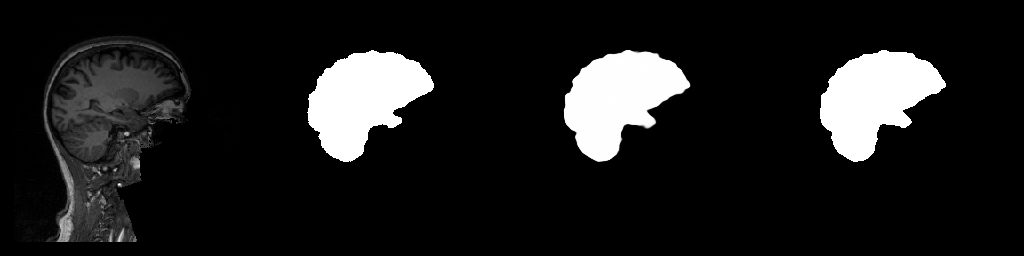

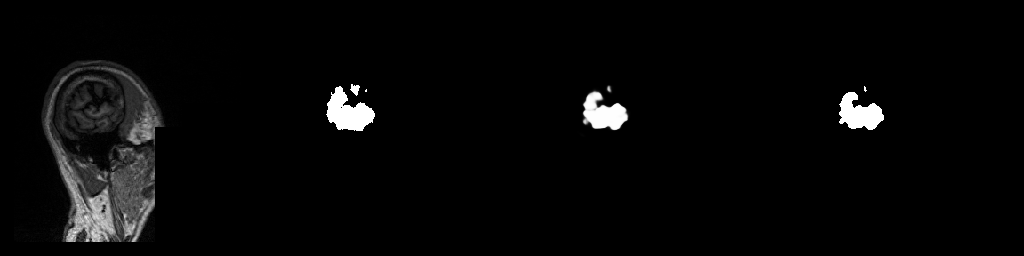

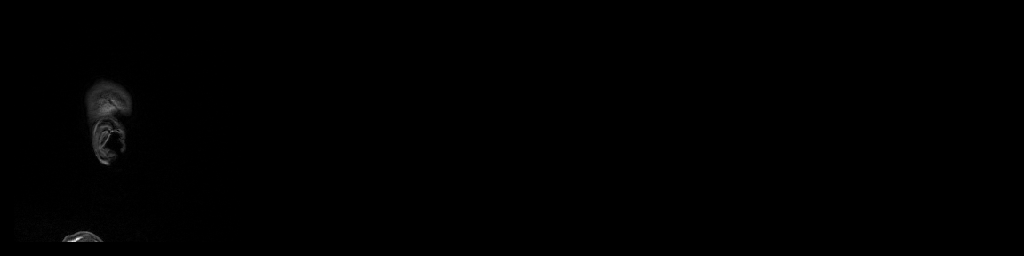

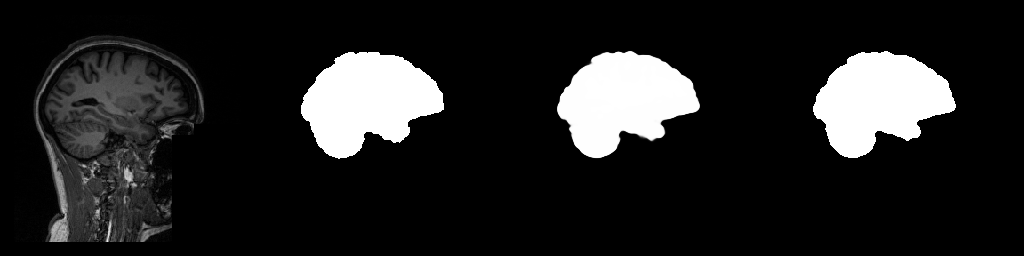

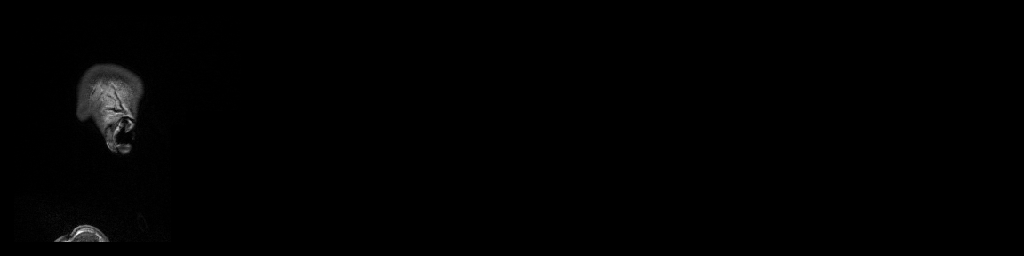

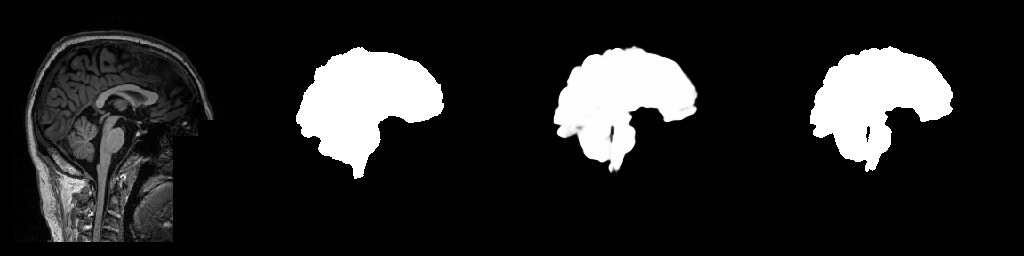

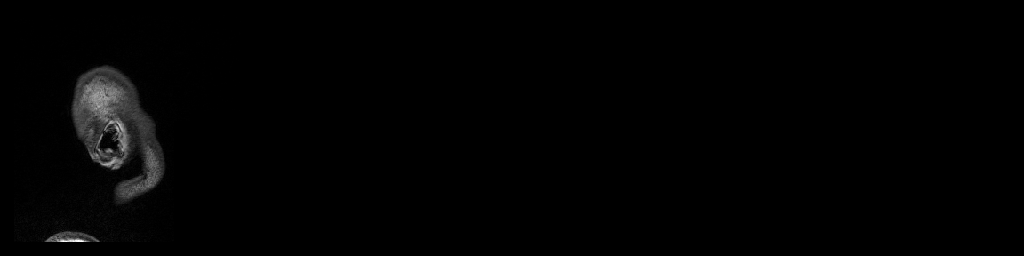

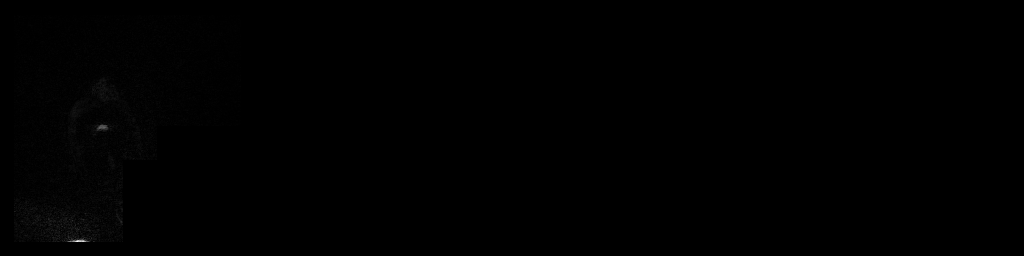

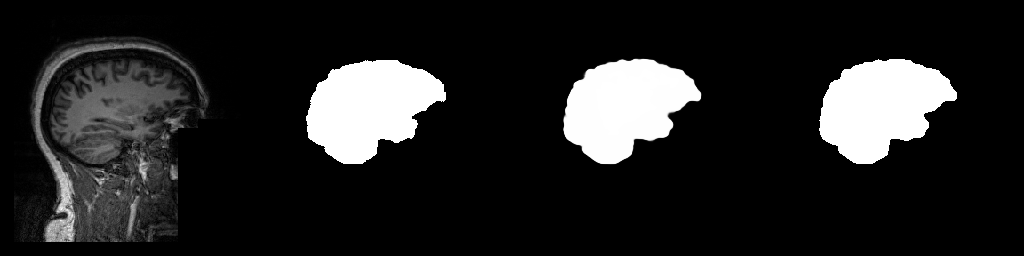

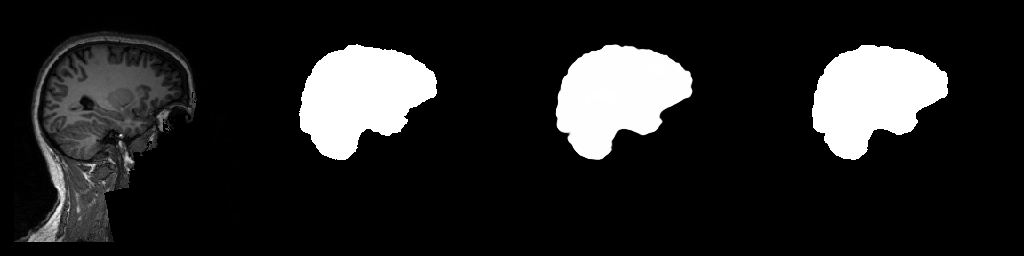

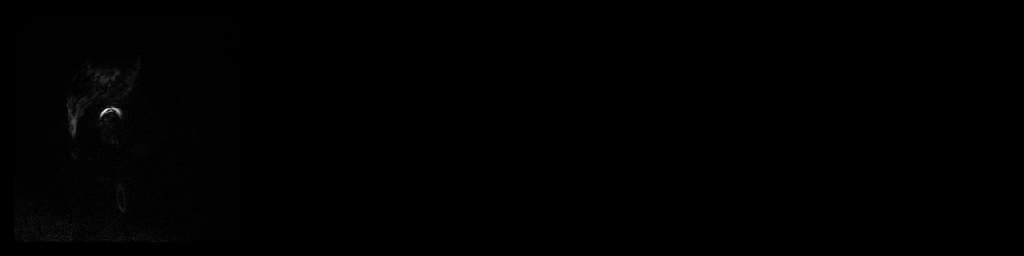

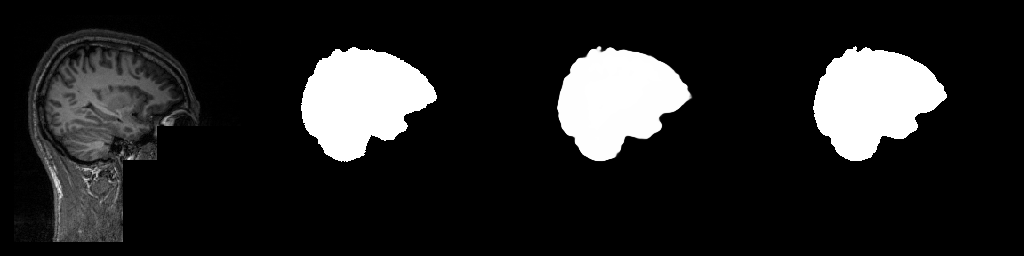

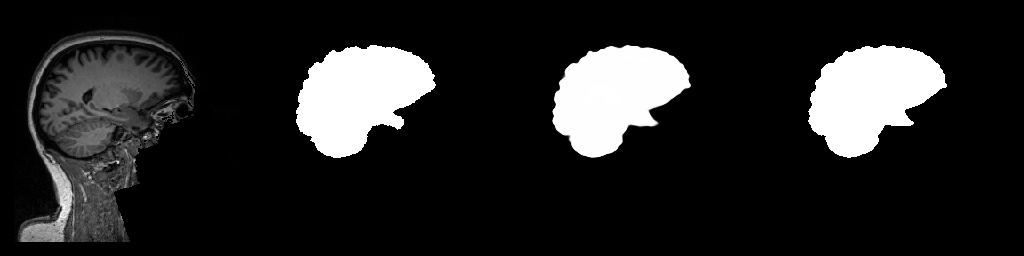

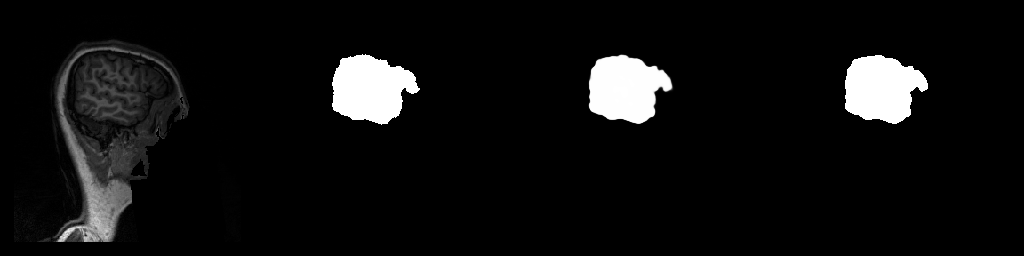

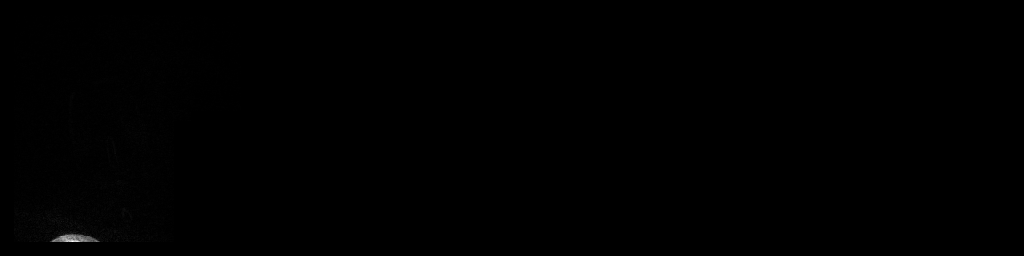

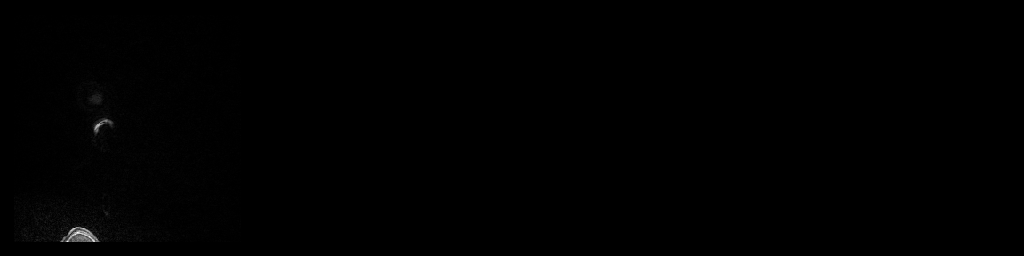

In [ ]:
import cv2
import numpy as np

test_batch = next(ffd_x_img_valid)
test_batch_mask = next(ffd_x_mask_valid)

result = loaded_model.predict(test_batch)
loaded_model.compile(optimizer = optimizer, loss=bce_jaccard_loss, metrics=[iou_score])
v1, v2 = loaded_model.evaluate(test_batch, test_batch_mask, BS)
print(v1)
print(v2)
for i,res in enumerate(result):
  show_img_mask([test_batch[i],test_batch_mask[i],res,round_mask(res,0.5)])


# Prefunctions and const


In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip
!pip install -U efficientnet==0.0.4
import tensorflow as tf
import numpy as np
from google.colab import patches as gc
from google.colab import drive
from pathlib import Path
import nibabel as nib
import cv2 as cv
from typing import Tuple, List
from pathlib import Path, PosixPath
import os
import matplotlib.pyplot as plt

--2020-06-15 15:33:00--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPU81cWlZMEVSMkVn [following]
--2020-06-15 15:33:01--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?&originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUUR

In [ ]:
def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
    data: nib.Nifti1Image = nib.load(str(path))
    data = nib.as_closest_canonical(data)
    raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
    return raw_data, data.affine

def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
    nib.save(nib.Nifti1Image(data, affine), str(path))

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def load_model(path_model,path_weights):
  file = open(path_model, 'r')
  file_model = file.read()
  file.close()
  return_model = tf.keras.models.model_from_json(file_model, custom_objects={'FixedDropout':tf.keras.layers.Dropout})
  # load weights into new model
  return_model.load_weights(path_weights)
  return return_model


net_x = '/content/drive/My Drive/unet_effnetb1_X/net_model.p'
weights_x = '/content/drive/My Drive/unet_effnetb1_X/net_weig.h5'
net_y = '/content/drive/My Drive/unet_effnetb1_Y/net_model.p'
weights_y = '/content/drive/My Drive/unet_effnetb1_Y/net_weig.h5'
net_z = '/content/drive/My Drive/unet_effnetb1_Z/net_model.p'
weights_z = '/content/drive/My Drive/unet_effnetb1_Z/net_weig.h5'

loaded_model_x = load_model(net_x,weights_x)
loaded_model_x = load_model(net_y,weights_y)
loaded_model_x = load_model(net_z,weights_z)

# 3D Predictions

In [ ]:
def make_prediction(input_slice):
  normalize = input_slice/np.amax(input_slice)*255
  padding = np.zeros((padding_width, padding_height), dtype=np.float32)
  delta_width = int((padding_width - input_slice.shape[0]) // 2)
  delta_height = int((padding_height - input_slice.shape[1]) // 2)
  padding[delta_width:delta_width+input_slice.shape[0], delta_height:delta_height+input_slice.shape[1]] = normalize
  predicted = loaded_model_x.predict(padding[None, :]/ 255) 
  squeezed = predicted.squeeze()
  unpadding = squeezed[delta_width:delta_width+input_slice.shape[0], delta_height:delta_height+input_slice.shape[1]]
  return unpadding


padding_width = 288
padding_height = 288
restriction = 0.7

path_test = Path('/content/FirstDataset/test')
for raw_file in path_test.iterdir():
    raw_volume, affine = load_raw_volume(raw_file)
    output_file = np.zeros(raw_volume.shape, dtype=np.float32)
  
    for a in range(raw_volume.shape[0]):
        output_file[a] = make_prediction(raw_volume[a])

    for b in range(raw_volume.shape[1]):
        output_file[:, b] += make_prediction(raw_volume[:, b ])

    for c in range(raw_volume.shape[2]):
        output_file[:, :, c] += make_prediction( raw_volume[:, :, c ])

    output_file = output_file / 3.0
    output_file[output_file > restriction] = 1
    output_file[output_file != 1] = 0
    path = Path('/content/drive/My Drive/Prediction_MW/Dataset1/'+ raw_file.name)
    save_labels(output_file, affine, path)
    print(path,' saved')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


/content/drive/My Drive/Prediction_MW/Dataset1/d0858c4acdecad0b89bae8e1c55ee92c.nii.gz  saved


KeyboardInterrupt: ignored